# Predicting hotel cancellations
*[A DataCamp challenge](https://app.datacamp.com/learn/competitions)*

![](img/predict-hotel-cancellation.jpg)

## The project

You are supporting a hotel with a project aimed to increase revenue from their room bookings. They believe that they can use data science to help them reduce the number of cancellations. This is where you come in! 

They have asked you to use any appropriate methodology to identify what contributes to whether a booking will be fulfilled or cancelled. They intend to use the results of your work to reduce the chance someone cancels their booking.

Produce recommendations for the hotel on what factors affect whether customers cancel their booking.

## The data

They have provided you with their bookings data in a file called `hotel_bookings.csv`, which contains the following:

| Column     | Description              |
|------------|--------------------------|
| `Booking_ID` | Unique identifier of the booking. |
| `no_of_adults` | The number of adults. |
| `no_of_children` | The number of children. |
| `no_of_weekend_nights` | Number of weekend nights (Saturday or Sunday). |
| `no_of_week_nights` | Number of week nights (Monday to Friday). |
| `type_of_meal_plan` | Type of meal plan included in the booking. |
| `required_car_parking_space` | Whether a car parking space is required. |
| `room_type_reserved` | The type of room reserved. |
| `lead_time` | Number of days before the arrival date the booking was made. |
| `arrival_year` | Year of arrival. |
| `arrival_month` | Month of arrival. |
| `arrival_date` | Date of the month for arrival. |
| `market_segment_type` | How the booking was made. |
| `repeated_guest` | Whether the guest has previously stayed at the hotel. |
| `no_of_previous_cancellations` | Number of previous cancellations. |
| `no_of_previous_bookings_not_canceled` | Number of previous bookings that were canceled. |
| `avg_price_per_room` | Average price per day of the booking. |
| `no_of_special_requests` | Count of special requests made as part of the booking. |
| `booking_status` | Whether the booking was cancelled or not. |

Source (data has been modified): https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Read the data from file
hotels = pd.read_csv("data/hotel_bookings.csv")
hotels

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not_Canceled
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,Canceled
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3.0,0.0,2.0,NaN,Meal Plan 1,0.0,NaN,85.0,2018.0,8.0,3.0,Online,NaN,0.0,0.0,167.80,1.0,Not_Canceled
36271,INN36272,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 1,228.0,2018.0,10.0,17.0,Online,0.0,0.0,0.0,90.95,2.0,Canceled
36272,INN36273,2.0,0.0,2.0,6.0,Meal Plan 1,0.0,Room_Type 1,148.0,2018.0,7.0,1.0,Online,0.0,0.0,0.0,98.39,2.0,Not_Canceled
36273,INN36274,2.0,0.0,0.0,3.0,Not Selected,0.0,Room_Type 1,63.0,2018.0,4.0,21.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled


In [3]:
# Store initial shape
hotels_init_shape = hotels.shape

# Inspect the dataframe
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          35862 non-null  float64
 2   no_of_children                        35951 non-null  float64
 3   no_of_weekend_nights                  35908 non-null  float64
 4   no_of_week_nights                     35468 non-null  float64
 5   type_of_meal_plan                     35749 non-null  object 
 6   required_car_parking_space            33683 non-null  float64
 7   room_type_reserved                    35104 non-null  object 
 8   lead_time                             35803 non-null  float64
 9   arrival_year                          35897 non-null  float64
 10  arrival_month                         35771 non-null  float64
 11  arrival_date   

## Data validation

### Duplicates

In [4]:
# Look for duplicate rows
hotels.duplicated().sum()

0

There are no duplicates, but because of the unique identifier for each row.

In [5]:
# Look for duplicate rows excluding first column unique identifier
subset_cols = hotels.columns[1:]

# Check for duplicates using subset of columns
hotels.duplicated(subset=subset_cols).sum()

7445

So there are indeed complete duplicates. I will remove them because they convey no extra information.

In [6]:
# Drop duplicated rows keeping only the last
hotels.drop_duplicates(subset=subset_cols, keep='last', inplace=True)

# Check again for duplicates using subset of columns
hotels.duplicated(subset=subset_cols).sum()

0

Let's look at duplicates of a certain subset of columns that I have selected, looking for repeated entries possibly made by mistake.

In [7]:
# Look for duplicates in a subset of columns
subset_cols = ['lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'avg_price_per_room']

# Check again for duplicates using subset of columns
hotels.duplicated(subset=subset_cols).sum()

3627

In [8]:
# Check the duplicated rows keeping the duplicates
hotels[hotels.duplicated(subset=subset_cols, keep=False)].sort_values(by=subset_cols)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
23007,INN23008,2.0,0.0,0.0,1.0,Meal Plan 1,0.0,Room_Type 5,0.0,2017.0,7.0,29.0,Complementary,0.0,0.0,0.0,0.00,2.0,Not_Canceled
24146,INN24147,2.0,0.0,0.0,1.0,Meal Plan 1,0.0,Room_Type 1,0.0,2017.0,7.0,29.0,Complementary,0.0,0.0,0.0,0.00,1.0,Not_Canceled
988,INN00989,2.0,0.0,1.0,0.0,Meal Plan 1,0.0,Room_Type 4,0.0,2017.0,8.0,3.0,Complementary,0.0,0.0,0.0,0.00,0.0,Not_Canceled
12627,INN12628,2.0,0.0,1.0,0.0,NaN,0.0,Room_Type 1,0.0,2017.0,8.0,3.0,Complementary,0.0,0.0,0.0,0.00,0.0,Not_Canceled
15260,INN15261,2.0,0.0,0.0,2.0,Not Selected,NaN,Room_Type 1,0.0,2017.0,8.0,4.0,Online,0.0,0.0,0.0,80.00,1.0,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24486,INN24487,1.0,0.0,1.0,0.0,Meal Plan 1,NaN,Room_Type 1,NaN,2018.0,9.0,26.0,Offline,0.0,0.0,NaN,99.00,0.0,Not_Canceled
28875,INN28876,1.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,NaN,2018.0,10.0,5.0,Offline,0.0,0.0,0.0,78.20,0.0,Canceled
29414,INN29415,1.0,0.0,0.0,2.0,Meal Plan 1,NaN,Room_Type 1,NaN,2018.0,10.0,5.0,Offline,0.0,0.0,0.0,78.20,0.0,Canceled
12012,INN12013,1.0,0.0,2.0,2.0,Meal Plan 1,NaN,Room_Type 1,NaN,2018.0,10.0,22.0,Online,0.0,0.0,NaN,80.75,0.0,Canceled


After all, I consider that these duplicates do not necessarily come from wrongly repeated entries. That could be the case if customer names were repeated, but there is nothing like that, so I will leave them.

### Missing values

In [9]:
# Check for missing values
hotels.isna().sum().sort_values(ascending=False)

required_car_parking_space              2465
market_segment_type                     1486
room_type_reserved                      1137
arrival_date                             946
no_of_week_nights                        788
no_of_special_requests                   782
repeated_guest                           575
no_of_previous_bookings_not_canceled     547
type_of_meal_plan                        519
arrival_month                            503
no_of_previous_cancellations             492
lead_time                                470
avg_price_per_room                       452
no_of_adults                             408
arrival_year                             373
no_of_weekend_nights                     367
no_of_children                           318
Booking_ID                                 0
booking_status                             0
dtype: int64

There are quite a number of missing values. Let's take a look at the missingness matrix.

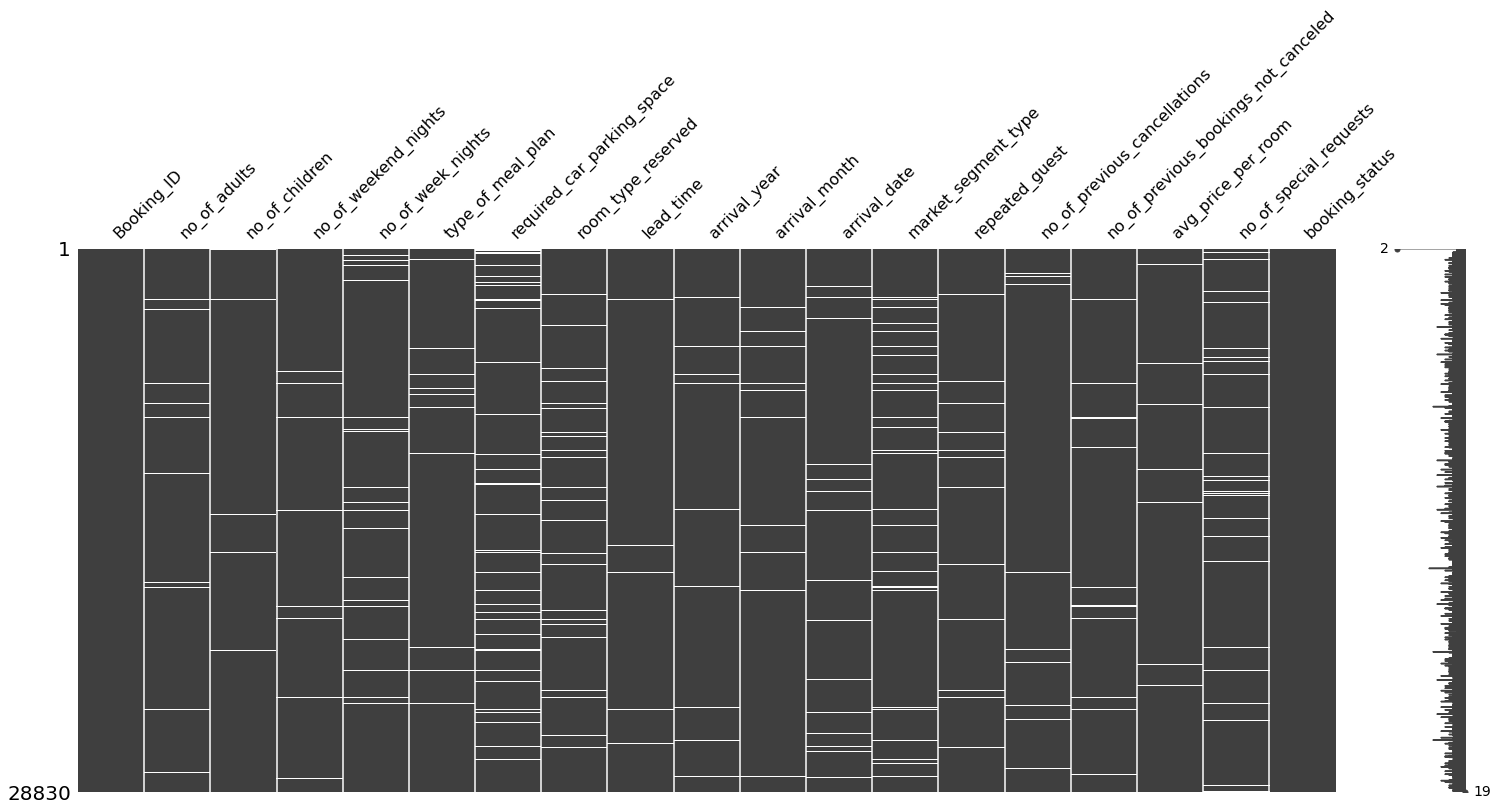

In [10]:
# Visualize missingness matrix
msno.matrix(hotels)
plt.show()

I will start by checking rows with multiple missing values.

In [11]:
# Rows with multiple missing values
hotels.isna().sum(axis=1).sort_values(ascending=False).head(10)

0        17
22176     9
33264     8
11088     8
27720     8
16632     7
5544      7
7392      7
29568     7
15840     7
dtype: int64

I will drop the first row because all its values are missing.

In [12]:
# Drop the first row
hotels.drop(0, inplace=True)

I am going to proceed checking missing values by columns and deciding how to deal with them in each case.

Let's start with the column with the maximum number of missing values: 'required_car_parking_space'.

In [13]:
# Look at the unique values
hotels['required_car_parking_space'].unique()

array([ 0., nan,  1.])

In this case it makes sense to assign missing values to 0 (not required car parking space).

In [14]:
# Fill missing values
hotels["required_car_parking_space"].fillna(0, inplace=True)

Let's look at the next column with multiple missing values: 'market_segment_type' (how the booking was made).

In [15]:
# Look at the unique values
hotels['market_segment_type'].unique()

array(['Online', 'Offline', nan, 'Aviation', 'Complementary', 'Corporate'],
      dtype=object)

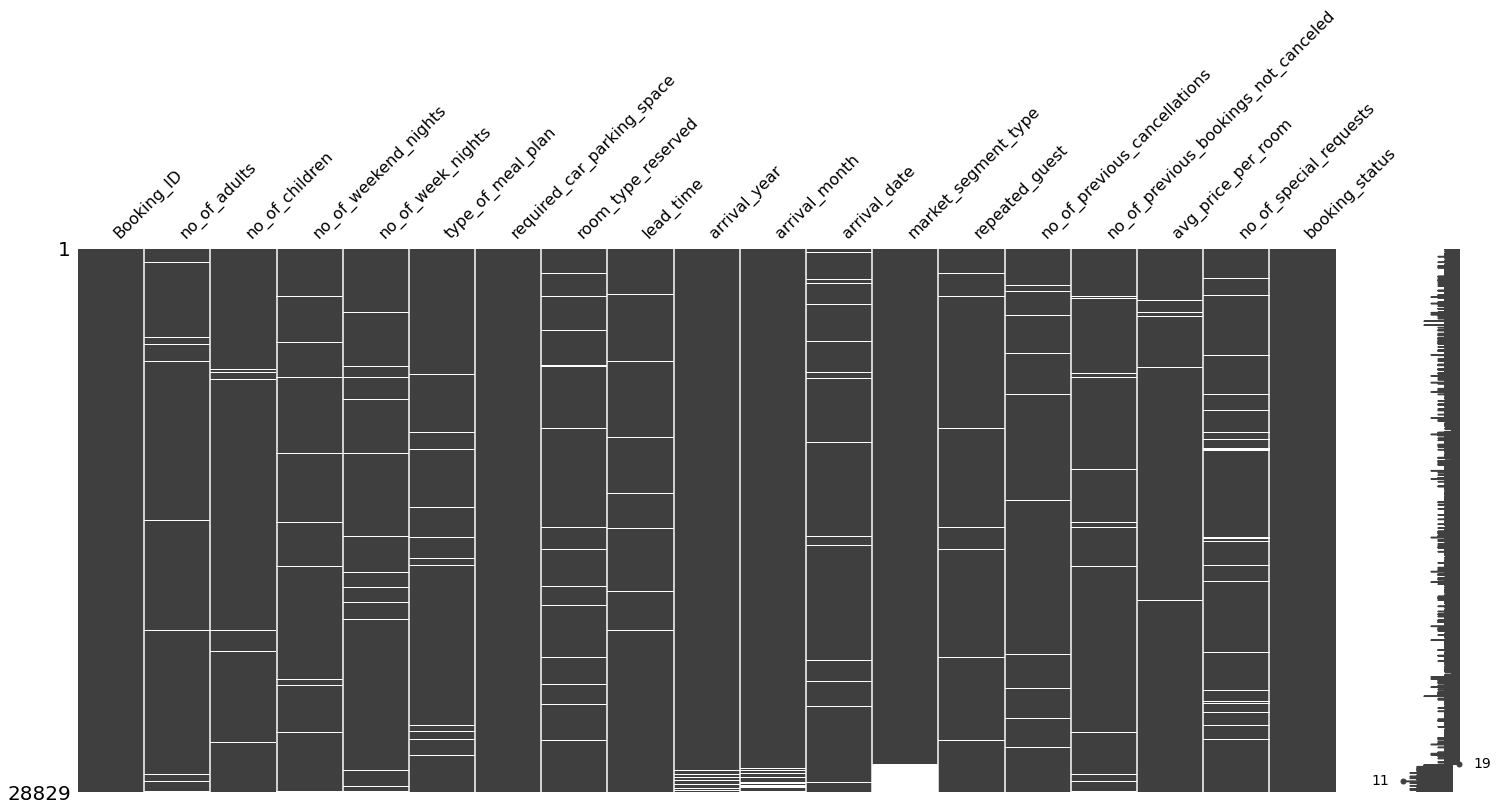

In [16]:
# Visualize missingness matrix
msno.matrix(hotels.sort_values('market_segment_type'))
plt.show()

We see that there is a structural component to missing values in 'market_segment_type': they also come with a considerable amount of missing values in 'arrival_year' and 'arrival_month'. Because of that. I decide to remove all those rows, because that way I also get rid of missing values in 'arrival_year' and 'arrival_month'.

In [17]:
# Drop rows with missing values in column
hotels.dropna(subset='market_segment_type', inplace=True)

Let's take a look at missing values in 'room_type_reserved'.

In [18]:
# Look at the unique values
hotels['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', nan, 'Room_Type 2', 'Room_Type 6',
       'Room_Type 7', 'Room_Type 5', 'Room_Type 3'], dtype=object)

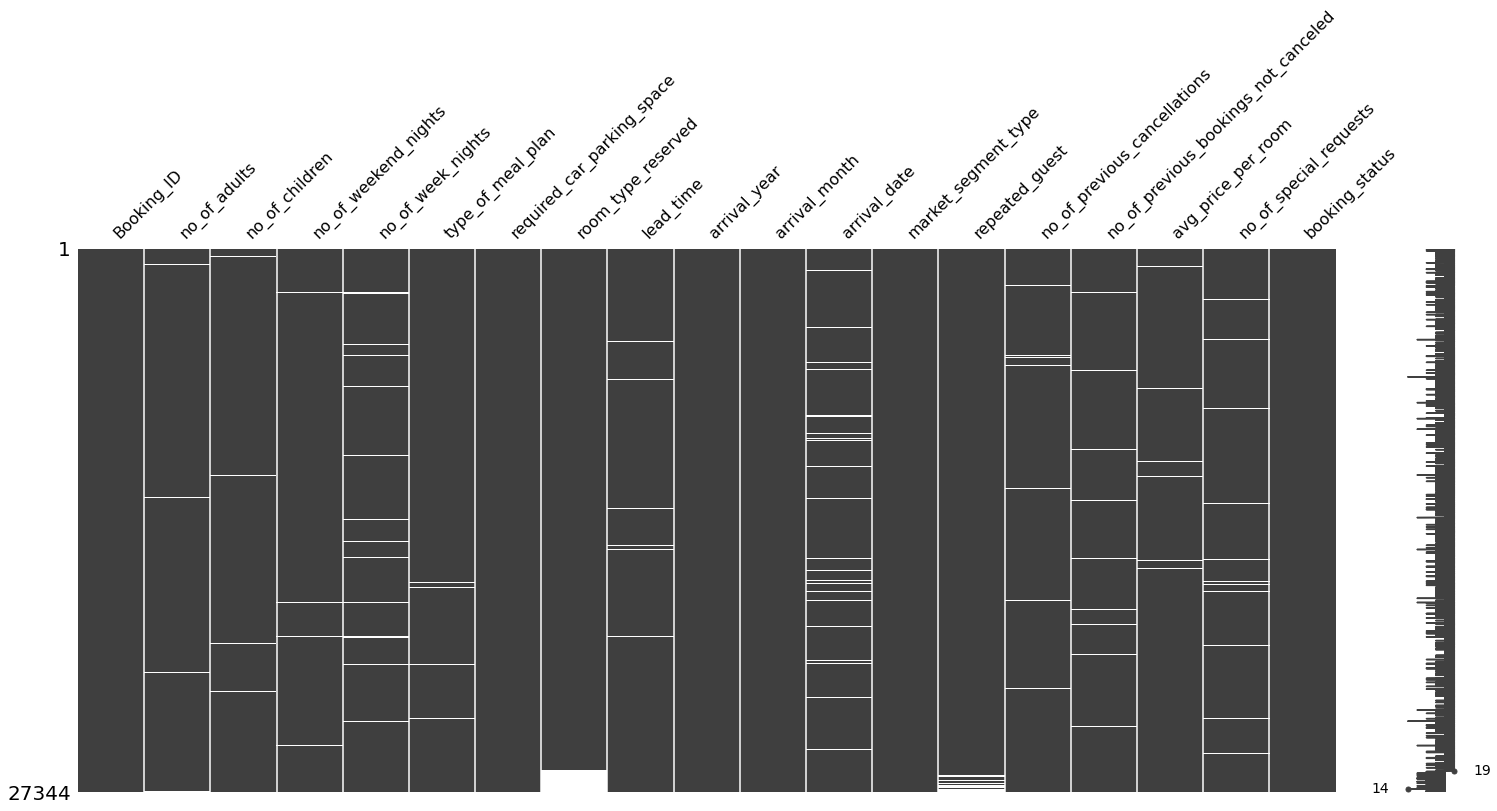

In [19]:
# Visualize missingness matrix
msno.matrix(hotels.sort_values('room_type_reserved'))
plt.show()

Missing values in 'room_type_reserved' come along with missign values in 'repeated_guest'.

In [20]:
# Look at the unique values
hotels['repeated_guest'].unique()

array([ 0.,  1., nan])

I decide to drop them altogether.

In [21]:
# Drop rows with missing values in column
hotels.dropna(subset='room_type_reserved', inplace=True)

Let's take a lok at the next most numerous missing values column, 'arrival_date'.

In [22]:
# Look at the unique values
hotels['arrival_date'].unique()

array([ 6., 11., 15., 18., 30., 26., 20.,  5., 10., 28., 19.,  7.,  9.,
       27., nan,  1., 21., 29., 16., 13.,  2.,  3., 25., 14.,  4., 17.,
       22., 23., 31.,  8., 12., 24.])

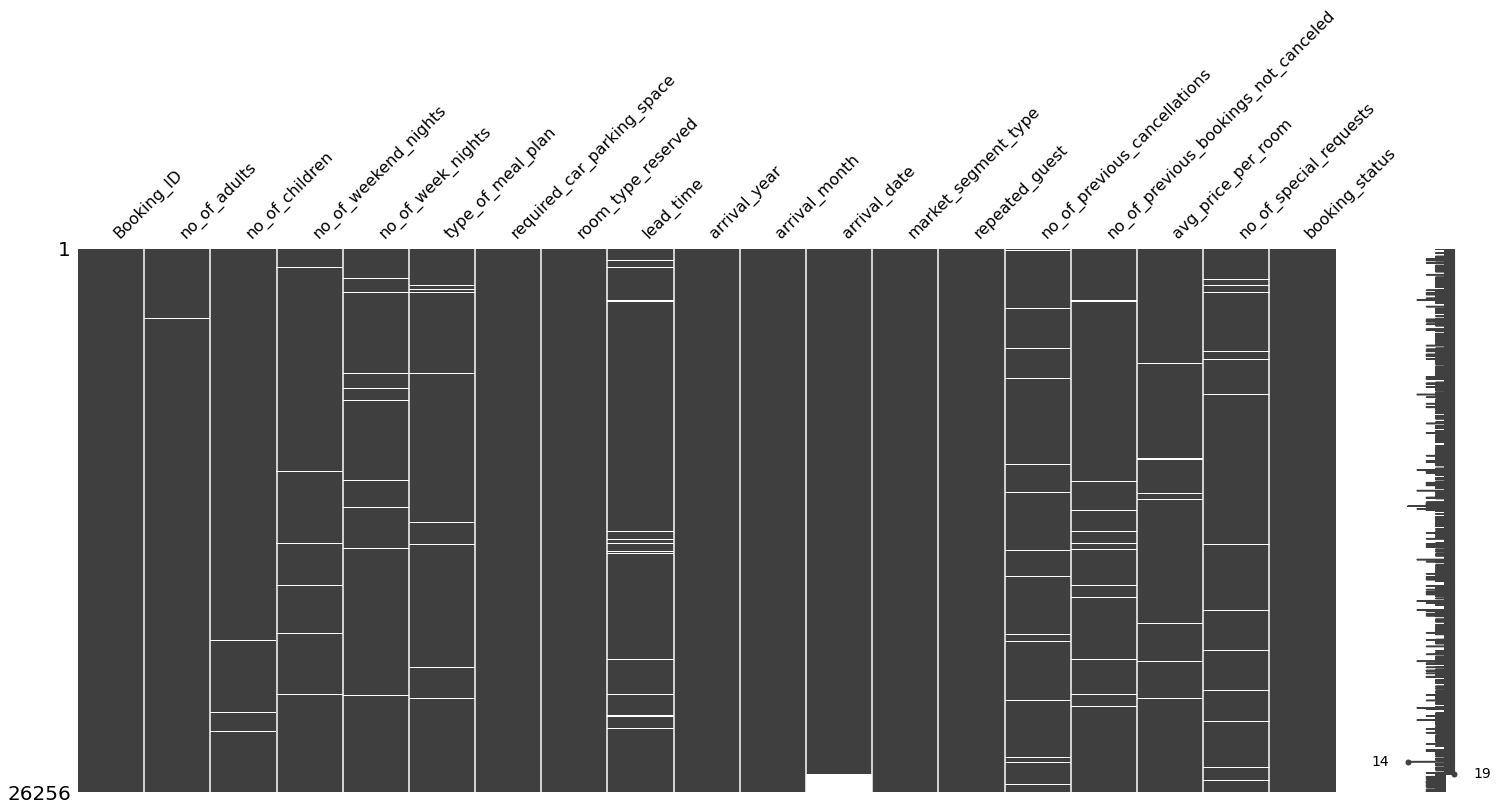

In [23]:
# Visualize missingness matrix
msno.matrix(hotels.sort_values('arrival_date'))
plt.show()

There are no significant missing values in other columns at the same row.

In [24]:
hotels.loc[hotels['arrival_date'].isna(), :]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
37,INN00038,2.0,0.0,0.0,1.0,Meal Plan 1,0.0,Room_Type 1,289.0,2017.0,10.0,NaN,Offline,0.0,0.0,0.0,67.00,0.0,Not_Canceled
74,INN00075,2.0,0.0,2.0,3.0,Meal Plan 1,0.0,Room_Type 4,34.0,2017.0,10.0,NaN,Offline,0.0,0.0,0.0,75.00,0.0,Not_Canceled
111,INN00112,2.0,0.0,1.0,0.0,Not Selected,0.0,Room_Type 1,1.0,2018.0,6.0,NaN,Online,0.0,0.0,0.0,127.00,1.0,Not_Canceled
148,INN00149,2.0,0.0,0.0,1.0,Meal Plan 1,0.0,Room_Type 1,56.0,2018.0,6.0,NaN,Offline,0.0,0.0,0.0,120.00,0.0,Not_Canceled
185,INN00186,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 4,56.0,2018.0,5.0,NaN,Online,0.0,0.0,0.0,140.40,1.0,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36112,INN36113,2.0,0.0,0.0,1.0,Meal Plan 1,0.0,Room_Type 1,83.0,2018.0,10.0,NaN,Online,0.0,0.0,0.0,118.80,1.0,Canceled
36149,INN36150,2.0,2.0,0.0,3.0,Meal Plan 1,0.0,Room_Type 2,166.0,2018.0,4.0,NaN,Online,0.0,0.0,0.0,73.60,2.0,Not_Canceled
36186,INN36187,2.0,0.0,0.0,4.0,Meal Plan 1,0.0,Room_Type 4,58.0,2018.0,11.0,NaN,Online,0.0,0.0,0.0,72.69,1.0,Not_Canceled
36223,INN36224,2.0,0.0,0.0,3.0,Meal Plan 1,0.0,Room_Type 1,193.0,2018.0,9.0,NaN,Online,0.0,0.0,0.0,93.09,1.0,Canceled


I cannot see any pattern for this rows in any other column, so I will directly drop those rows.

In [25]:
# Drop rows with missing values in column
hotels.dropna(subset='arrival_date', inplace=True)

Let's take a look at the next column with more missing values: 'no_of_week_nights'.

In [26]:
# Look at the unique values
hotels['no_of_week_nights'].unique()

array([ 3.,  1.,  4.,  5.,  0.,  2., nan, 10.,  6., 11.,  7., 15.,  9.,
       13.,  8., 14., 12., 17., 16.])

'no_of_weekend_nights' may be related.

In [27]:
# Look at the unique values
hotels['no_of_weekend_nights'].unique()

array([ 2.,  1.,  0., nan,  4.,  3.,  6.,  5.])

This is the criteria I will follow to solve missing values in these two columns:
- If both are missing, I will drop that row.
- If one of them is missing and the value of the other one is 0, then I will drop that row.
- If one of them is missing and the value of the other one is not 0, then I will assign 0.

In [28]:
# Drop rows with missing values in both column
hotels.dropna(subset=['no_of_week_nights', 'no_of_weekend_nights'], how='all', inplace=True)

# Drop if missing value and 0 in the other column
hotels.drop(hotels[(hotels['no_of_week_nights'].isna()) & (hotels['no_of_weekend_nights'] == 0)].index, inplace=True)

hotels.drop(hotels[(hotels['no_of_weekend_nights'].isna()) & (hotels['no_of_week_nights'] == 0)].index, inplace=True)

# Assign value 0 if missing value but the other column has a non-zero value
hotels.loc[(hotels['no_of_week_nights'].isna()) & (hotels['no_of_weekend_nights'] != 0),
           'no_of_week_nights'] = 0

hotels.loc[(hotels['no_of_week_nights'] != 0) & (hotels['no_of_weekend_nights'].isna()),
           'no_of_weekend_nights'] = 0

Let's take a look at 'no_of_special_requests'.

In [29]:
# Look at the unique values
hotels['no_of_special_requests'].unique()

array([ 1.,  0.,  3.,  2., nan,  4.,  5.])

It makes sense to assign 0 to missing values in this column.

In [30]:
# Fill missing values in column
hotels['no_of_special_requests'].fillna(0, inplace=True)

Let's take a look at 'type_of_meal_plan'.

In [31]:
# Look at the unique values
hotels['type_of_meal_plan'].unique()

array(['Not Selected', 'Meal Plan 1', nan, 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

I assign missing values to 'Not Selected'.

In [32]:
# Fill missing values in column
hotels['type_of_meal_plan'].fillna('Not Selected', inplace=True)

I will drop the 'lead_time' missing value rows. ('lead_time' has many unique values, I will check later on its data range with a rapid visualization).

In [33]:
# Drop rows with missing values in column
hotels.dropna(subset='lead_time', inplace=True)

Let's take a look at the next one, 'avg_price_per_room'.

I will drop the missing values.

In [34]:
# Drop rows with missing values in column
hotels.dropna(subset='avg_price_per_room', inplace=True)

Let's now take a look at the 'no_of_adults' and 'no_of_children' columns. I will use the following criteria:
- I will drop rows with missing values in 'no_of_adults'.
- I will assign 0 to missing 'no_of_children' if 'no_of_adults' is not 0.

In [35]:
# Drop rows with missing values in column
hotels.dropna(subset='no_of_adults', inplace=True)

# Assign value 0 if missing value but the other column has a non-zero value
hotels.loc[(hotels['no_of_children'].isna()) & (hotels['no_of_adults'] != 0),
           'no_of_children'] = 0

# Fill missing values in column
hotels.dropna(subset='no_of_children', inplace=True)

Let's take a look at the last features with missing values.

In [36]:
# Look at the unique values
hotels['no_of_previous_cancellations'].unique()

array([ 0., nan,  3.,  1.,  2., 11.,  4.,  5.,  6., 13.])

In [37]:
# Look at the unique values
hotels['no_of_previous_bookings_not_canceled'].unique()

array([ 0., nan,  5.,  1.,  3.,  4., 12., 19.,  2., 15., 17.,  7., 20.,
       16., 50., 13.,  6., 14., 34., 18., 10., 23., 11.,  8., 49., 47.,
       53.,  9., 33., 24., 52., 22., 21., 48., 28., 39., 25., 31., 38.,
       51., 42., 37., 35., 56., 44., 27., 32., 55., 26., 45., 30., 57.,
       46., 54., 43., 58., 41., 29., 40., 36.])

I will direclty drop rows with missing values.

In [38]:
# Drop rows with missing values in column
hotels.dropna(subset=['no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled'], how='any', inplace=True)

Finally, let's confirm that we have removed all missing values.

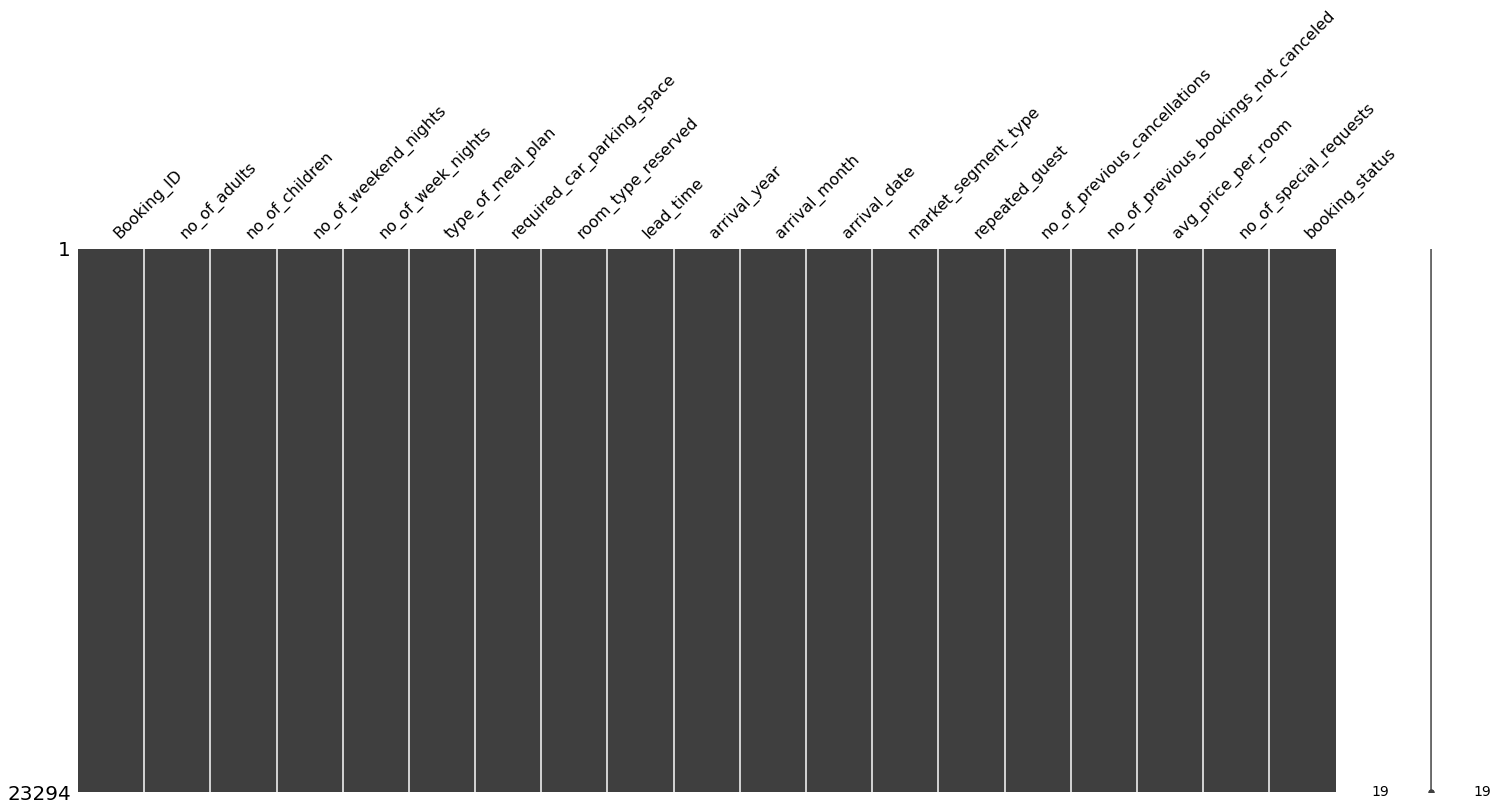

In [39]:
# Visualize missingness matrix
msno.matrix(hotels)
plt.show()

In [40]:
# Check for missing values
hotels.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

###  Data consistency

Let's explore date consistency creating a new column with datetime format, it will try to convert year, month and day into a date.

In [41]:
# Create new column 'date', coerce errors to detect date inconsistencies
hotels['date'] = pd.to_datetime(dict(year=hotels['arrival_year'],
                                     month=hotels['arrival_month'],
                                     day=hotels['arrival_date']),
                                errors='coerce')

# Sum date inconsistencies (coerced errors set to na)
hotels['date'].isna().sum()

31

Let's find what these date inconsistencies are about.

In [42]:
hotels.loc[hotels['date'].isna(), ['arrival_year', 'arrival_month', 'arrival_date']]

,arrival_year,arrival_month,arrival_date
2626,2018.0,2.0,29.0
3677,2018.0,2.0,29.0
5600,2018.0,2.0,29.0
7648,2018.0,2.0,29.0
8000,2018.0,2.0,29.0
9153,2018.0,2.0,29.0
9245,2018.0,2.0,29.0
9664,2018.0,2.0,29.0
9934,2018.0,2.0,29.0
10593,2018.0,2.0,29.0


2018 was not a leap year, so these entries with date '2018-02-29' are incorrect. I will drop them.

In [43]:
# Drop rows of unexisting date 2018-02-29
hotels.drop(hotels[(hotels['arrival_year'] == 2018) \
                   & (hotels['arrival_month'] == 2) \
                   & (hotels['arrival_date'] == 29)].index, inplace=True)

### Data ranges

'lead_time' had many unique values, I will visualize a rapid histogram to check that they are within an expected range.

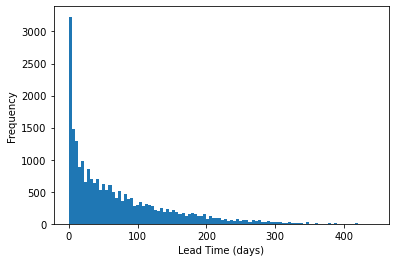

In [44]:
hotels['lead_time'].plot(kind="hist", bins=100)
plt.xlabel('Lead Time (days)')
plt.show()

Let's take a look at the average price per room.

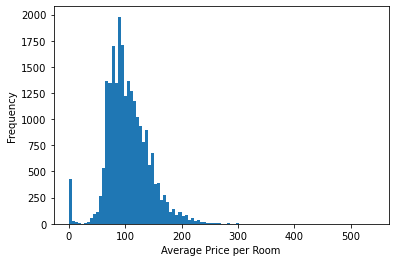

In [45]:
hotels['avg_price_per_room'].plot(kind="hist", bins=100)
plt.xlabel('Average Price per Room')
plt.show()

There are some rows with price around zero. I will leave it like that because I have no further information.

### Data types

In [46]:
# Inspect the columns' data types
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23263 entries, 1 to 36274
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Booking_ID                            23263 non-null  object        
 1   no_of_adults                          23263 non-null  float64       
 2   no_of_children                        23263 non-null  float64       
 3   no_of_weekend_nights                  23263 non-null  float64       
 4   no_of_week_nights                     23263 non-null  float64       
 5   type_of_meal_plan                     23263 non-null  object        
 6   required_car_parking_space            23263 non-null  float64       
 7   room_type_reserved                    23263 non-null  object        
 8   lead_time                             23263 non-null  float64       
 9   arrival_year                          23263 non-null  float64       
 10

Let's convert to 'category' type the corresponding columns.

In [47]:
# Turn to category
hotels['type_of_meal_plan'] = hotels['type_of_meal_plan'].astype('category')

# Turn to category
hotels['room_type_reserved'] = hotels['room_type_reserved'].astype('category')

# Turn to category
hotels['market_segment_type'] = hotels['market_segment_type'].astype('category')

# Turn to category
hotels['booking_status'] = hotels['booking_status'].astype('category')

In [48]:
# Inspect the columns' data types
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23263 entries, 1 to 36274
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Booking_ID                            23263 non-null  object        
 1   no_of_adults                          23263 non-null  float64       
 2   no_of_children                        23263 non-null  float64       
 3   no_of_weekend_nights                  23263 non-null  float64       
 4   no_of_week_nights                     23263 non-null  float64       
 5   type_of_meal_plan                     23263 non-null  category      
 6   required_car_parking_space            23263 non-null  float64       
 7   room_type_reserved                    23263 non-null  category      
 8   lead_time                             23263 non-null  float64       
 9   arrival_year                          23263 non-null  float64       
 10

The dataset size has changed after validation.

In [49]:
print(f'{hotels_init_shape[0]} rows and {hotels_init_shape[1]} columns initially')
print(f'{hotels.shape[0]} rows and {hotels.shape[1]} after cleaning')

36275 rows and 19 columns initially
23263 rows and 20 after cleaning


## Exploratory Data Analysis
I will explore the data inspecting cancelations for each feature.

In [50]:
# Define color palette
palette = ['steelblue', 'tomato']

# Define feature plotting function
def plot_by(feature, label='',
            xticks_range=range(1), xticks_labels=[''],
            rotation=0):
    
    # Group by feature
    hotels_featurely = hotels.groupby(feature)['booking_status'].value_counts()\
                    .unstack().reindex(['Not_Canceled', 'Canceled'], axis=1)
    
    # Calculate cancelation index
    hotels_featurely['cancel_index'] = hotels_featurely['Canceled']\
                    / (hotels_featurely['Canceled'] + hotels_featurely['Not_Canceled'])
    
    # Define plot figure
    fig, ax = plt.subplots(figsize=(7, 5))

    # Plot
    hotels_featurely.drop('cancel_index', axis=1).plot(ax=ax,
                                                       marker='.', linewidth=0.75,
                                                       color=palette)
    # Plot twin axis
    ax2 = ax.twinx()
    hotels_featurely['cancel_index'].plot(ax=ax2,
                                          marker='.', linewidth=0.75,
                                          label='Cancel index', color='black')
    # Area
    sns.despine()
    ax.grid(axis="y")
    ax.set_axisbelow(True)
    # Labels    
    ax.set_xlabel(label, fontsize=14)
    ax.set_ylabel("# of bookings", fontsize=14)
    ax2.set_ylabel("Cancelation index", fontsize=14)
    # Ticks
    if xticks_range != range(1):
        ax.set_xticks(xticks_range, labels=xticks_labels)
    ax.tick_params(axis='x', labelsize=13, rotation=rotation)
    ax.tick_params(axis='y', labelsize=12)
    # Limits
    ax.set_ylim(0)
    ax2.set_ylim(0, 1)
    # Legend
    ax.legend(title='Booking status', loc='upper left', bbox_to_anchor=(1.1, 1))
    ax2.legend(loc='upper left', bbox_to_anchor=(1.1, 0.7))
    # Show
    plt.show()
    
    return

### Inspecting proportion of target variable

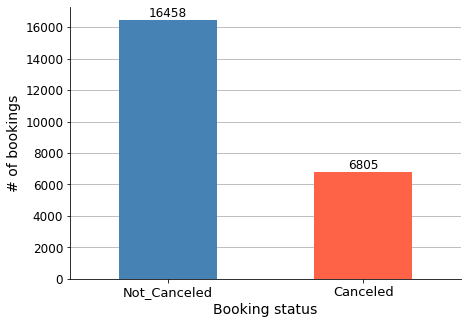

In [51]:
# Plot
fig, ax = plt.subplots(figsize=(7, 5))

hotels['booking_status'].value_counts().plot(kind='bar', color=palette)

sns.despine()
ax.grid(axis="y")
ax.set_axisbelow(True)
  
ax.set_xlabel('Booking status', fontsize=14)
ax.set_ylabel("# of bookings", fontsize=14)

ax.tick_params(axis='x', labelsize=13, rotation=0)
ax.tick_params(axis='y', labelsize=12)

ax.bar_label(ax.containers[0], size=12)

plt.show()

In [52]:
# Get the proportion of the binary target variable
hotels['booking_status'].value_counts(normalize=True)

Not_Canceled    0.707475
Canceled        0.292525
Name: booking_status, dtype: float64

There is an imbalance in the binary target variable. The proportion difference is not very high, but it could affect negatively the predictive results because the class of interest is the one less represented (we want to predict cancelled bookings) and therefore there is less information available to it. I will address this issue while modeling.

### Inspecting by dates

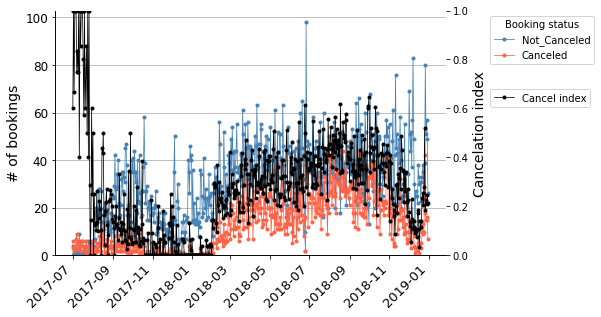

In [53]:
plot_by('date',
        rotation=45)

### Inspecting by month

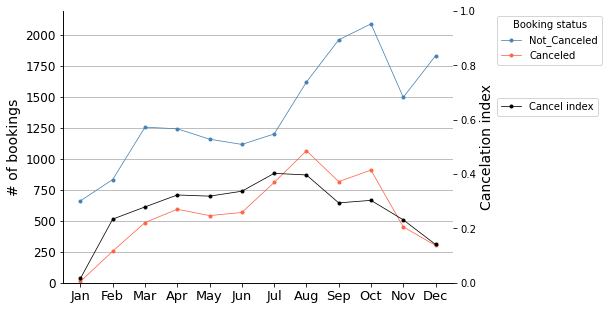

In [54]:
by_date = hotels.groupby('date')['booking_status'].value_counts()\
            .unstack().reindex(['Not_Canceled', 'Canceled'], axis=1)
by_month = by_date.groupby(by_date.index.month)[['Not_Canceled', 'Canceled']].sum()

by_month['cancel_index'] = by_month['Canceled'] / (by_month['Canceled'] + by_month['Not_Canceled'])

# Define plot figure
fig, ax = plt.subplots(figsize=(7, 5))
# Plot
by_month.drop('cancel_index', axis=1).plot(ax=ax,
                                                   marker='.', linewidth=0.75,
                                                   color=palette)
# Plot twin axis
ax2 = ax.twinx()
by_month['cancel_index'].plot(ax=ax2,
                                      marker='.', linewidth=0.75,
                                      label='Cancel index', color='black')
# Area
sns.despine()
ax.grid(axis="y")
ax.set_axisbelow(True)
# Labels    
ax.set_xlabel('', fontsize=14)
ax.set_ylabel("# of bookings", fontsize=14)
ax2.set_ylabel("Cancelation index", fontsize=14)
# Ticks
ax.set_xticks(range(1, 13), labels=list(calendar.month_abbr)[1:])
ax.tick_params(axis='x', labelsize=13, rotation=0)
ax.tick_params(axis='y', labelsize=12)
# Limits
ax.set_ylim(0)
ax2.set_ylim(0, 1)
# Legend
ax.legend(title='Booking status', loc='upper left', bbox_to_anchor=(1.1, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(1.1, 0.7))
# Show
plt.show()

### Inspecting by week day

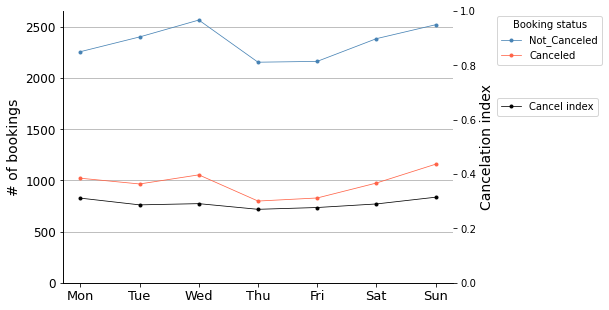

In [55]:
hotels['day_of_week'] = hotels['date'].dt.day_of_week
plot_by('day_of_week',
        xticks_range=range(7), xticks_labels=list(calendar.day_abbr))

### Inspecting by lead time

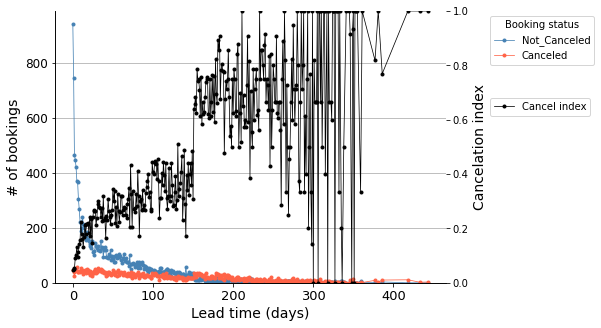

In [56]:
plot_by('lead_time', label='Lead time (days)')

### Inspecting by repeated guest and previous cancelations

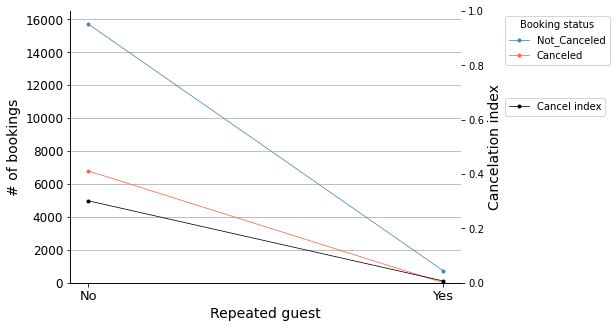

In [57]:
plot_by('repeated_guest', label='Repeated guest',
        xticks_range=range(2), xticks_labels=['No', 'Yes'])

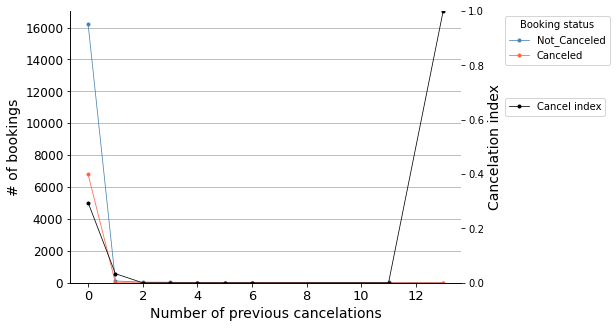

In [58]:
plot_by('no_of_previous_cancellations',
        label='Number of previous cancelations')

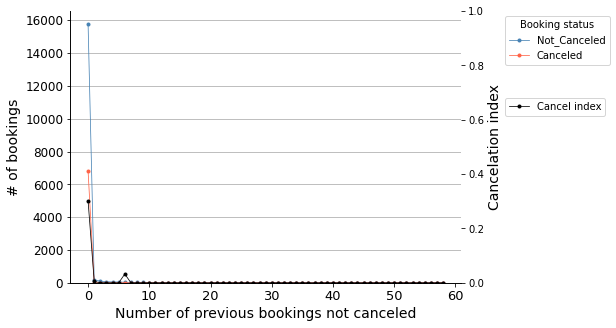

In [59]:
plot_by('no_of_previous_bookings_not_canceled',
        label='Number of previous bookings not canceled')

### Inspecting by number of adults and children

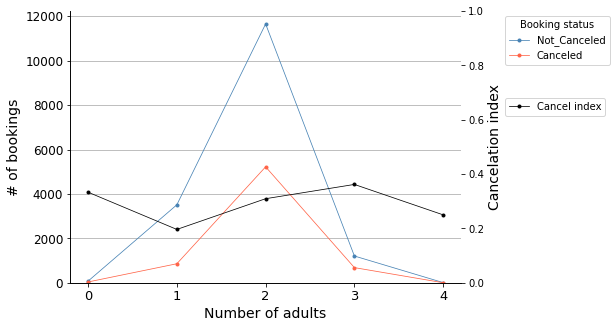

In [60]:
plot_by('no_of_adults', label='Number of adults',
       xticks_range=range(5), xticks_labels=list(range(5)))

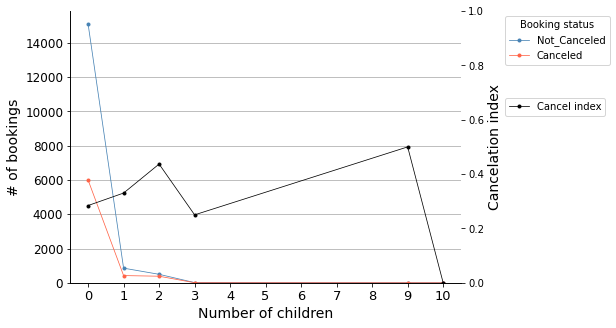

In [61]:
plot_by('no_of_children', label='Number of children',
       xticks_range=range(11), xticks_labels=list(range(11)))

### Inspecting by number of week and weekdend nights

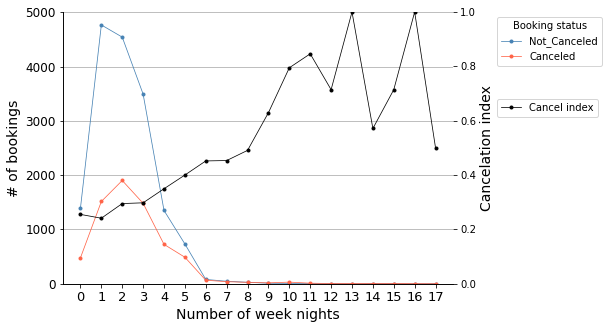

In [62]:
plot_by('no_of_week_nights', label='Number of week nights',
       xticks_range=range(18), xticks_labels=list(range(18)))

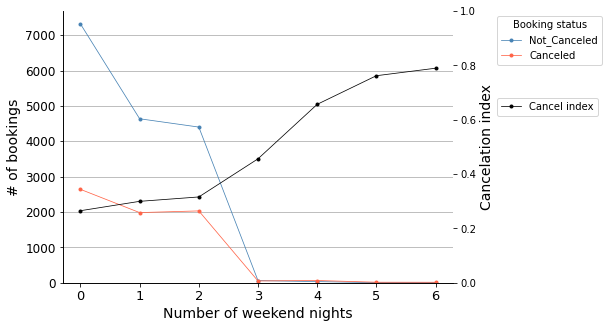

In [63]:
plot_by('no_of_weekend_nights', label='Number of weekend nights')

### Inspecting by required car parking space

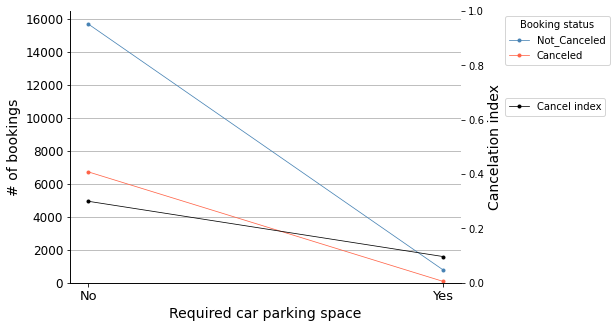

In [64]:
plot_by('required_car_parking_space', label='Required car parking space',
        xticks_range=range(2), xticks_labels=['No', 'Yes'])

### Inspecting by number of special requests

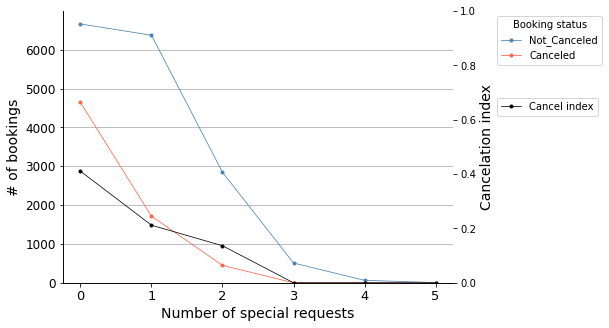

In [65]:
plot_by('no_of_special_requests', label='Number of special requests')

### Inspect by average price per room

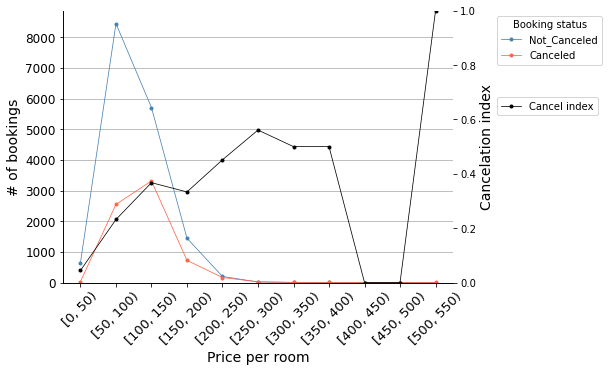

In [66]:
# Group by feature
by_price = hotels.groupby('avg_price_per_room')['booking_status'].value_counts()\
                .unstack().reindex(['Not_Canceled', 'Canceled'], axis=1)

# Establish price intervals
bins = pd.IntervalIndex.from_tuples([(i, i + 50) for i in range(0, 550, 50)], closed='left')

# Create new column with intervals
by_price["interval"] = pd.cut(by_price.index, bins)

by_price_interval = by_price.groupby('interval')[['Not_Canceled', 'Canceled']].sum()

by_price_interval['cancel_index'] = by_price_interval['Canceled']\
            / (by_price_interval['Canceled'] + by_price_interval['Not_Canceled'])
by_price_interval.fillna(0, inplace=True)

# Define plot figure
fig, ax = plt.subplots(figsize=(7, 5))
# Plot
by_price_interval.drop('cancel_index', axis=1).plot(ax=ax,
                                                   marker='.', linewidth=0.75,
                                                   color=palette)
# Plot twin axis
ax2 = ax.twinx()
by_price_interval['cancel_index'].plot(ax=ax2,
                                      marker='.', linewidth=0.75,
                                      label='Cancel index', color='black')
# Area
sns.despine()
ax.grid(axis="y")
ax.set_axisbelow(True)
# Labels    
ax.set_xlabel('Price per room', fontsize=14)
ax.set_ylabel("# of bookings", fontsize=14)
ax2.set_ylabel("Cancelation index", fontsize=14)
# Ticks
ax.set_xticks(range(11), labels=['['+str(i)+', '+str(i+50)+')' for i in range(0, 550, 50)])
ax.tick_params(axis='x', labelsize=13, rotation=45)
ax.tick_params(axis='y', labelsize=12)
# Limits
ax.set_ylim(0)
ax2.set_ylim(0, 1)
# Legend
ax.legend(title='Booking status', loc='upper left', bbox_to_anchor=(1.1, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(1.1, 0.7))
# Show
plt.show()

### Inspect by market segment type

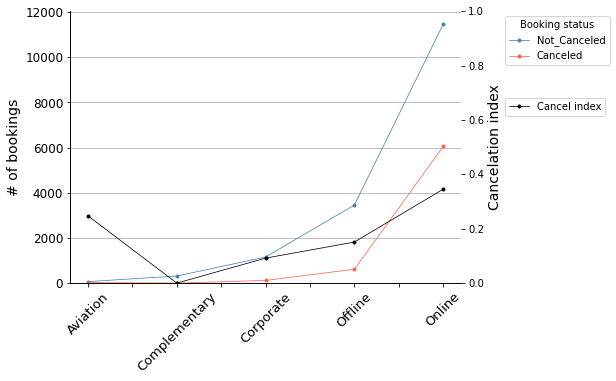

In [67]:
plot_by('market_segment_type', rotation=45)

### Inspect by room type

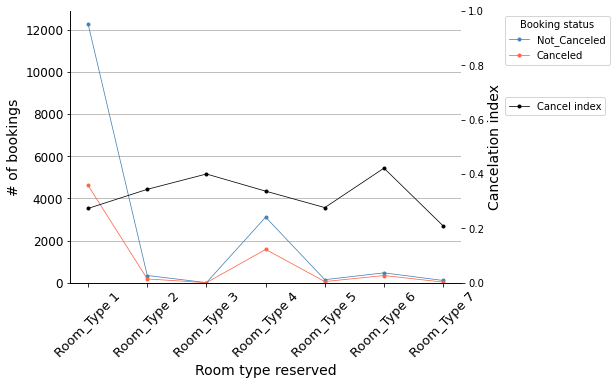

In [68]:
plot_by('room_type_reserved', label='Room type reserved',
       rotation=45)

### Inspect by meal type

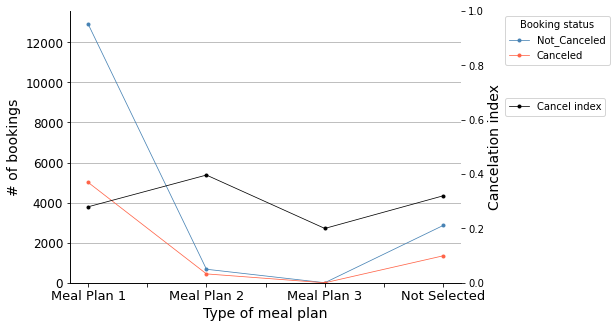

In [69]:
plot_by('type_of_meal_plan', label='Type of meal plan')

## Modelling

### Data preprocessing

In [70]:
# Define features
features = hotels.drop(['Booking_ID', 'booking_status', 'date'], axis=1)

# Define target
target = hotels['booking_status'].replace({'Not_Canceled': 0, 'Canceled': 1})

In [71]:
# # Redundant features
# features.corr()

In [72]:
# Prepare features
X = pd.get_dummies(features)

# Prepare target
y = target

In [84]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'day_of_week',
       'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')

In [73]:
# Split dataset into 70% training and 30% test set, and stratify
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

# Scale X
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [74]:
# Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_log = logreg.predict(X_test_scaled)

In [75]:
# Print the performance metrics
print('Confusion matrix: \n\n', confusion_matrix(y_test, y_pred_log))
print('\nReport: \n', classification_report(y_test, y_pred_log,
                                           target_names=["Not cancelled ->", "Cancelled ->"]))

Confusion matrix: 

 [[4444  493]
 [ 858 1184]]

Report: 
                   precision    recall  f1-score   support

Not cancelled ->       0.84      0.90      0.87      4937
    Cancelled ->       0.71      0.58      0.64      2042

        accuracy                           0.81      6979
       macro avg       0.77      0.74      0.75      6979
    weighted avg       0.80      0.81      0.80      6979



In [83]:
importance = logreg.coef_[0]
importance

array([ 1.58342872e-02,  4.83248476e-02,  6.24367484e-02,  1.09133394e-01,
       -2.95263602e-01,  1.10578213e+00,  1.14263346e-01, -1.22127844e-01,
       -4.20784876e-02, -4.86870274e-01,  8.90334597e-02, -2.34855936e-01,
        6.19313201e-01, -1.17747707e+00, -4.74923167e-02, -3.18537392e-02,
       -1.57226498e-02,  9.27320577e-02,  3.97630351e-02,  7.56384076e-02,
       -4.94277046e-02,  1.57537348e-02,  5.80502170e-04, -3.58131266e-02,
       -9.53703099e-02, -8.12072113e-02,  7.67230105e-02, -5.98156219e-01,
        7.46100045e-02, -4.02201525e-01,  4.63889017e-01])

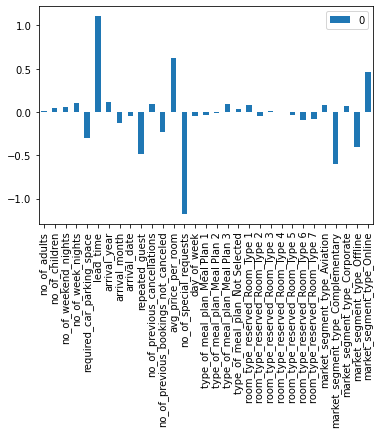

In [89]:
pd.DataFrame(importance, index=X.columns).plot(kind='bar')
plt.show()

### kNN

In [76]:
# K-Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

In [77]:
# Print the performance metrics
print('Confusion matrix: \n\n', confusion_matrix(y_test, y_pred_knn))
print('\nReport: \n', classification_report(y_test, y_pred_knn,
                                           target_names=["Not cancelled ->", "Cancelled ->"]))

Confusion matrix: 

 [[4519  418]
 [ 979 1063]]

Report: 
                   precision    recall  f1-score   support

Not cancelled ->       0.82      0.92      0.87      4937
    Cancelled ->       0.72      0.52      0.60      2042

        accuracy                           0.80      6979
       macro avg       0.77      0.72      0.73      6979
    weighted avg       0.79      0.80      0.79      6979



### Decision Trees

In [78]:
# DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(X_train, y_train) # No need for X scaling
y_pred_dt = dt.predict(X_test)

In [79]:
# Print the performance metrics
print('Confusion matrix: \n\n', confusion_matrix(y_test, y_pred_dt))
print('\nReport: \n', classification_report(y_test, y_pred_dt,
                                           target_names=["Not cancelled ->", "Cancelled ->"]))

Confusion matrix: 

 [[4456  481]
 [ 668 1374]]

Report: 
                   precision    recall  f1-score   support

Not cancelled ->       0.87      0.90      0.89      4937
    Cancelled ->       0.74      0.67      0.71      2042

        accuracy                           0.84      6979
       macro avg       0.81      0.79      0.80      6979
    weighted avg       0.83      0.84      0.83      6979

